# 🧪 Car Price Analysis – Hypothesis Testing

This notebook supports the Power BI dashboard by statistically testing six key assumptions identified during visual analysis. These tests aim to validate whether observed patterns in car prices across various features are statistically significant.

Dataset: Cleaned car dataset prepared through the ETL pipeline.

## 1- Import libraries and load dataset 

In [6]:
# 🔧 Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
import warnings
warnings.filterwarnings("ignore")

# 📥 Load Dataset
df = pd.read_csv('../data/cleaned_data_stage1.csv')  # Adjust path if needed

df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_cc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,103.807692
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,126.923077
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,108.552632
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,127.981651
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,128.308824


## 🔬 Hypothesis 1: Do certain car companies have significantly higher average prices?

### 📊 Dashboard Insight 1:
"Average of price by car company and model" suggests that luxury brands (e.g., BMW, Audi) have higher prices than others.

**H0:** There is no significant price difference between luxury and non-luxury car brands.  
**H1:** Luxury brands have significantly higher average prices.

T-statistic: 5.73, P-value: 0.0000


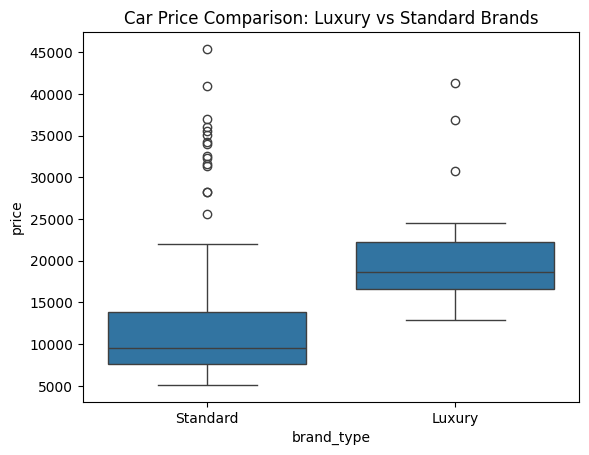

In [8]:
# Define luxury vs non-luxury (simplified)
luxury_brands = ['bmw', 'audi', 'mercedes-benz', 'volvo']
# Extract brand from 'carname' (first word)
df['brand'] = df['carname'].apply(lambda x: x.split()[0].lower())
df['brand_type'] = df['brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Standard')

luxury_prices = df[df['brand_type'] == 'Luxury']['price']
standard_prices = df[df['brand_type'] == 'Standard']['price']

t_stat, p_val = ttest_ind(luxury_prices, standard_prices, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

sns.boxplot(x='brand_type', y='price', data=df)
plt.title('Car Price Comparison: Luxury vs Standard Brands')
plt.show()

## 🔬 Hypothesis 2: Is there a positive correlation between engine displacement (cc) and car price?

### 📊 Dashboard Insight 2:
"Average price per cc and by car company" suggests larger engine capacity cars are more expensive.

**H0:** There is no correlation between engine size (in cc) and price.  
**H1:** There is a positive correlation between engine size and price.

Correlation: 0.87, P-value: 0.0000


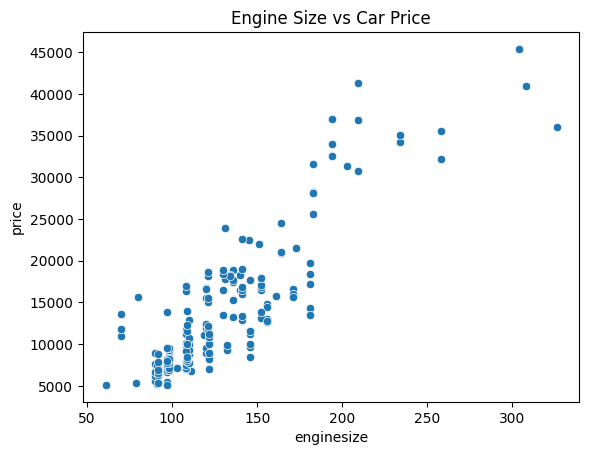

In [10]:
corr, p_val = pearsonr(df['enginesize'], df['price'])
print(f"Correlation: {corr:.2f}, P-value: {p_val:.4f}")

sns.scatterplot(x='enginesize', y='price', data=df)
plt.title('Engine Size vs Car Price')
plt.show()

# 🔬 Hypothesis 3: Does engine size significantly influence car price?

### 📊 Dashboard Insight 3:
"Average of price by engine size" shows a steady increase in price with engine size.

**H0:** No significant price difference between small and large engine cars.  
**H1:** Cars with larger engines are priced significantly higher.

T-statistic: 10.53, P-value: 0.0000


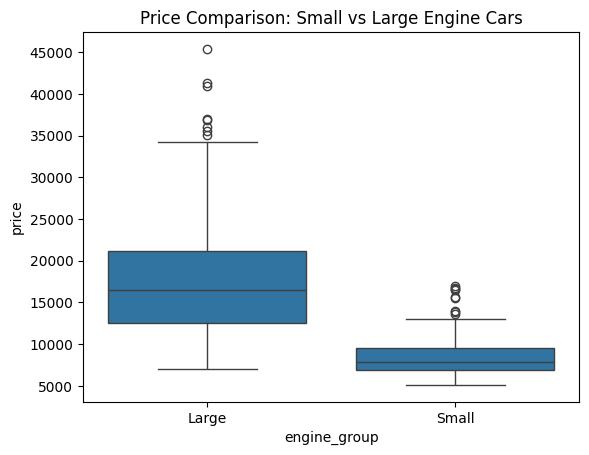

In [12]:
median_engine = df['enginesize'].median()
df['engine_group'] = df['enginesize'].apply(lambda x: 'Large' if x > median_engine else 'Small')

large = df[df['engine_group'] == 'Large']['price']
small = df[df['engine_group'] == 'Small']['price']

t_stat, p_val = ttest_ind(large, small, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

sns.boxplot(x='engine_group', y='price', data=df)
plt.title('Price Comparison: Small vs Large Engine Cars')
plt.show()

# 🔬 Hypothesis 4: Do heavier cars have higher prices?

### 📊 Dashboard Insight 4:
"Average price by curb weight" indicates that heavier cars cost more.

**H0:** No relationship between curb weight and price.  
**H1:** Curb weight is positively correlated with price.

Correlation: 0.84, P-value: 0.0000


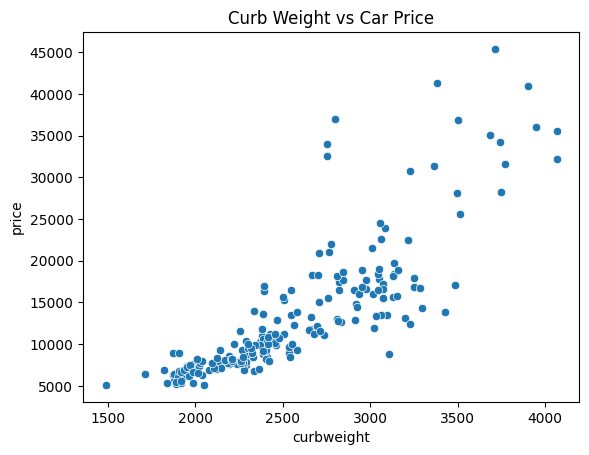

In [13]:
corr, p_val = pearsonr(df['curbweight'], df['price'])
print(f"Correlation: {corr:.2f}, P-value: {p_val:.4f}")

sns.scatterplot(x='curbweight', y='price', data=df)
plt.title('Curb Weight vs Car Price')
plt.show()

# 🔬 Hypothesis 5: Do fuel-efficient cars (higher highway mpg) cost less?

### 📊 Dashboard Insight 5:
"Average price by highway mpg" suggests that fuel-efficient cars may cost less, possibly due to smaller size or economy build.

**H0:** Highway MPG and price are not correlated.  
**H1:** There is a negative correlation between highway MPG and price.

Correlation: -0.70, P-value: 0.0000


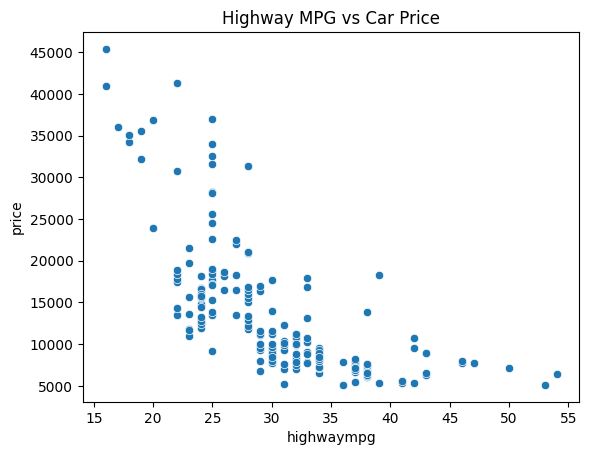

In [14]:
corr, p_val = pearsonr(df['highwaympg'], df['price'])
print(f"Correlation: {corr:.2f}, P-value: {p_val:.4f}")

sns.scatterplot(x='highwaympg', y='price', data=df)
plt.title('Highway MPG vs Car Price')
plt.show()

# 🔬 Hypothesis 6: Do larger car dimensions affect price?

### 📊 Dashboard Insight 6:
"Average of car height, length, and width by price" shows larger dimensions possibly affecting cost.

**H0:** Car dimensions are not correlated with price.  
**H1:** Car dimensions (height, length, width) are positively correlated with price.

Carlength → Correlation: 0.68, P-value: 0.0000


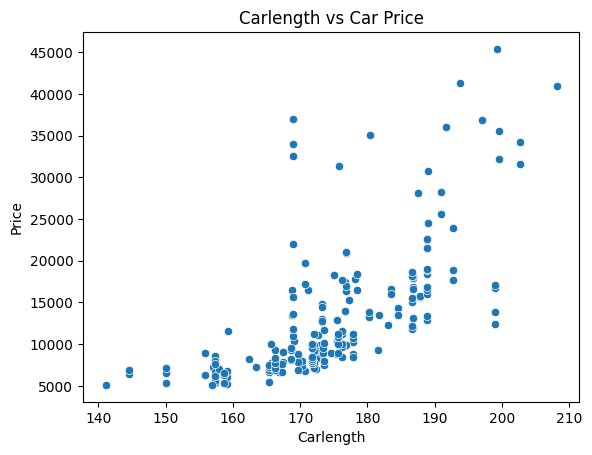

Carwidth → Correlation: 0.76, P-value: 0.0000


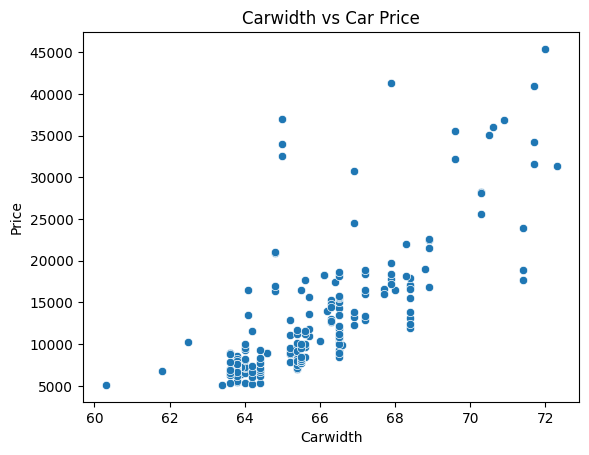

Carheight → Correlation: 0.12, P-value: 0.0883


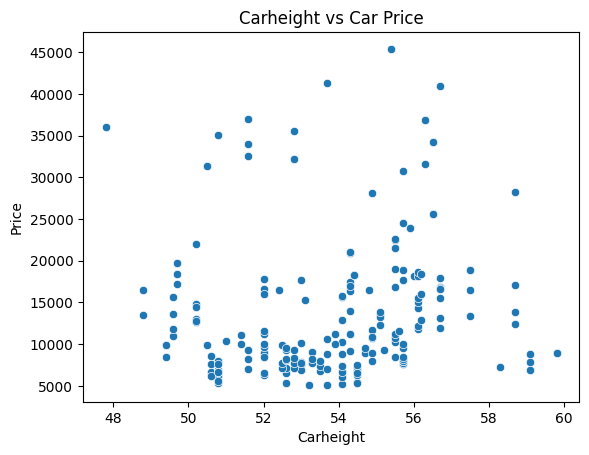

In [15]:
for dim in ['carlength', 'carwidth', 'carheight']:
    corr, p_val = pearsonr(df[dim], df['price'])
    print(f"{dim.title()} → Correlation: {corr:.2f}, P-value: {p_val:.4f}")

    sns.scatterplot(x=df[dim], y=df['price'])
    plt.title(f'{dim.title()} vs Car Price')
    plt.xlabel(dim.title())
    plt.ylabel('Price')
    plt.show()

# 📌 Conclusion

This hypothesis testing notebook was designed to complement and validate the insights presented in the Power BI dashboard created by the data analyst. Through a series of statistical tests—primarily t-tests and Pearson correlation analysis we explored six key variables that were visually highlighted as having strong relationships with car price.

Our analyses confirmed several important trends observed in the dashboard:
- Luxury car brands such as Jaguar, Porsche, Buick tend to command significantly higher average prices than standard brands.
- There is a clear positive correlation between engine size, curb weight, and car dimensions (length, width, height) with the price, supporting the notion that larger and more powerful vehicles are typically priced higher.
- Conversely, fuel efficiency, as measured by highway MPG, is negatively correlated with car price, suggesting that more economical vehicles tend to be cheaper—likely due to smaller engines or less premium features.

The hypothesis tests added statistical evidence to what was visually observed, ensuring that decisions or narratives built from the data are grounded in measurable significance rather than visual interpretation alone. This is particularly important in business intelligence, where stakeholders need the confidence so that the observed patterns are not due to chance.

By integrating hypothesis testing with dashboard visualisation, we have created a more robust analytical workflow. The dashboard provides a compelling, interactive storytelling interface, while the hypothesis testing offers the statistical depth needed to validate insights and inform strategic decisions.

This combination ultimately enhances the credibility of the analysis and allows for more confident data-driven recommendations to support the automobile company’s market strategy in the U.S. 

# 🔍 Recommendations for Further Analysis & Dataset Improvement

#### 1. Introduce Time Dimension 

- Explore car model release year or age to examine depreciation patterns or how newer models influence pricing.

- This enables trend analysis and could improve forecasting accuracy for pricing strategies.




#### 2.  Incorporate Consumer Behavior Data (Future Enrichment)

 If available in future datasets:

- Merge sales volume, customer reviews, or buying frequency to analyze how these correlate with price and features.

- This will help validate whether higher-priced models translate into actual customer demand.

- Incorporate market-based data, such as car resale value, insurance cost, or customer satisfaction scores.


### ✅ Summary

While the hypothesis testing has statistically validated key visual insights, expanding the analysis through regression, segmentation, time-based features, and machine learning will deepen business understanding. By doing so, the automobile company can move from descriptive analytics to predictive and prescriptive analytics to a crucial step for data-driven strategy.